In [1]:
import tensorflow_data_validation as tfdv

from aif360.datasets import StandardDataset
import numpy as np
import pandas as pd
import experiment_util as util
import models
import random

%matplotlib ipympl
%matplotlib inline

import matplotlib.pyplot as plt
import plot_util as putil
import numpy as np

np.random.seed(0)
random.seed(0)

pip install 'aif360[LawSchoolGPA]'


Load datasets, modify it for the experiment and use Framework to examine the dataset.

In [2]:
raw_df=pd.read_csv("../Datasets/Kaggle/Custom Churn/Bank Customer Churn Prediction.csv",index_col=0)

In [3]:
df=raw_df.copy()

In [4]:
stats = tfdv.generate_statistics_from_dataframe(df)
tfdv.visualize_statistics(stats)

Tensorflow Data Validation has flag **Balance**, **credit_card**, **active_member**, and **churn** feature as feature with significant amount of missing value. However, in the context of the dataset, those 0 values do not represent missing values.

In [6]:
df=df.dropna()
df=df.reset_index()
df=df.drop(["customer_id"],axis=1)

In [11]:
folds_index=np.array_split(df.sample(frac=1).index,5)
eval=util.evaluation(df,"gender","churn","Male",folds_index)
result=pd.DataFrame([],columns=util.column)
result.columns.name="Bank"
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference


Scikit-learn data preprocessing

In [12]:
numeric_feautre_names=df.select_dtypes(include=["number"]).columns
categorical_feature_names=df.select_dtypes(include=["object_"]).columns

pre_df=df.copy()

for nc in numeric_feautre_names:
    pre_df[nc]=util.min_max_noramlize(pre_df[nc])   

for cc in categorical_feature_names:
    pre_df[cc]=pd.factorize(pre_df[cc])[0]

In [13]:
result=util.append_Series(result,eval.cross_validation("Random Forest",models.RandomForest,pre_df))
result

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.03927,-0.03927,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.03927,0.862


In [14]:
result=util.append_Series(result,eval.cross_validation("Neural Network",models.NeuralNetwork,pre_df))
result

c:\Users\15783\source\repos\Ethical-Framework\Fairness Indicator\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\15783\source\repos\Ethical-Framework\Fairness Indicator\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\15783\source\repos\Ethical-Framework\Fairness Indicator\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201


In [15]:
result=util.append_Series(result,eval.cross_validation("Gradient Boosting",models.GradientBoost,pre_df))
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201
Gradient Boosting,0.044644,-0.022271,0.079518,-0.079518,0.022271,-0.070718,0.070718,0.015793,-0.044637,-0.015793,-0.079518,0.8647


Scikit-learn models with DisparateImpactRemover from AIF360 preprocessing

In [17]:
raw_dataset=StandardDataset(df=df, label_name="churn",
                                    favorable_classes=[1],
                                    scores_name="",
                                    protected_attribute_names=['gender'],
                                    privileged_classes=[["Male"]],
                                    categorical_features=["country"])

In [18]:
result=util.append_Series(result,eval.cross_validation("Random Forest (DI)",models.DI_RandomForest,raw_dataset))
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201
Gradient Boosting,0.044644,-0.022271,0.079518,-0.079518,0.022271,-0.070718,0.070718,0.015793,-0.044637,-0.015793,-0.079518,0.8647
Random Forest (DI),0.051590,-0.017691,0.031695,-0.031695,0.017691,-0.055910,0.055910,0.031093,-0.055185,-0.031093,-0.031695,0.8603


In [19]:
result=util.append_Series(result,eval.cross_validation("Neural Network (DI)",models.DI_NeuralNetwork,raw_dataset))
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201
Gradient Boosting,0.044644,-0.022271,0.079518,-0.079518,0.022271,-0.070718,0.070718,0.015793,-0.044637,-0.015793,-0.079518,0.8647
Random Forest (DI),0.051590,-0.017691,0.031695,-0.031695,0.017691,-0.055910,0.055910,0.031093,-0.055185,-0.031093,-0.031695,0.8603
Neural Network (DI),0.086408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-0.086408,NaN,0.000000,0.7963


The framework output NaN is due to the Neural Network model with Disparate Impact Remover preprocessing will only output Negative predictions.

In [20]:
result=util.append_Series(result,eval.cross_validation("Gradient Boosting (DI)",models.DI_GradientBoost,raw_dataset))
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201
Gradient Boosting,0.044644,-0.022271,0.079518,-0.079518,0.022271,-0.070718,0.070718,0.015793,-0.044637,-0.015793,-0.079518,0.8647
Random Forest (DI),0.051590,-0.017691,0.031695,-0.031695,0.017691,-0.055910,0.055910,0.031093,-0.055185,-0.031093,-0.031695,0.8603
Neural Network (DI),0.086408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-0.086408,NaN,0.000000,0.7963
Gradient Boosting (DI),0.048145,-0.020508,0.060613,-0.060613,0.020508,-0.064592,0.064592,0.016121,-0.049279,-0.016121,-0.060613,0.8633


Since the bias evalutation metrics of Neutral Network with Disparate Impact is invalid, those result will be removed from the analysis of the experiment result

In [21]:
result=result.drop(["Neural Network (DI)"])
result

Bank,Accuracy Difference,FPR Difference,FNR Difference,TPR Difference,TNR Difference,PR Difference,NR Difference,FDR Difference,FOR Difference,Precision Difference,Recall Difference,Accuracy
Random Forest,0.051081,-0.019035,0.039270,-0.039270,0.019035,-0.058624,0.058624,0.026432,-0.053654,-0.026432,-0.039270,0.8620
Neural Network,0.057419,-0.019186,0.144684,-0.144684,0.019186,-0.057245,0.057245,-0.088960,-0.056062,0.088960,-0.144684,0.8201
Gradient Boosting,0.044644,-0.022271,0.079518,-0.079518,0.022271,-0.070718,0.070718,0.015793,-0.044637,-0.015793,-0.079518,0.8647
Random Forest (DI),0.051590,-0.017691,0.031695,-0.031695,0.017691,-0.055910,0.055910,0.031093,-0.055185,-0.031093,-0.031695,0.8603
Gradient Boosting (DI),0.048145,-0.020508,0.060613,-0.060613,0.020508,-0.064592,0.064592,0.016121,-0.049279,-0.016121,-0.060613,0.8633


In [25]:
import importlib
importlib.reload(putil)

<module 'plot_util' from 'c:\\Users\\15783\\source\\repos\\Ethical-Framework\\Fairness Indicator\\plot_util.py'>

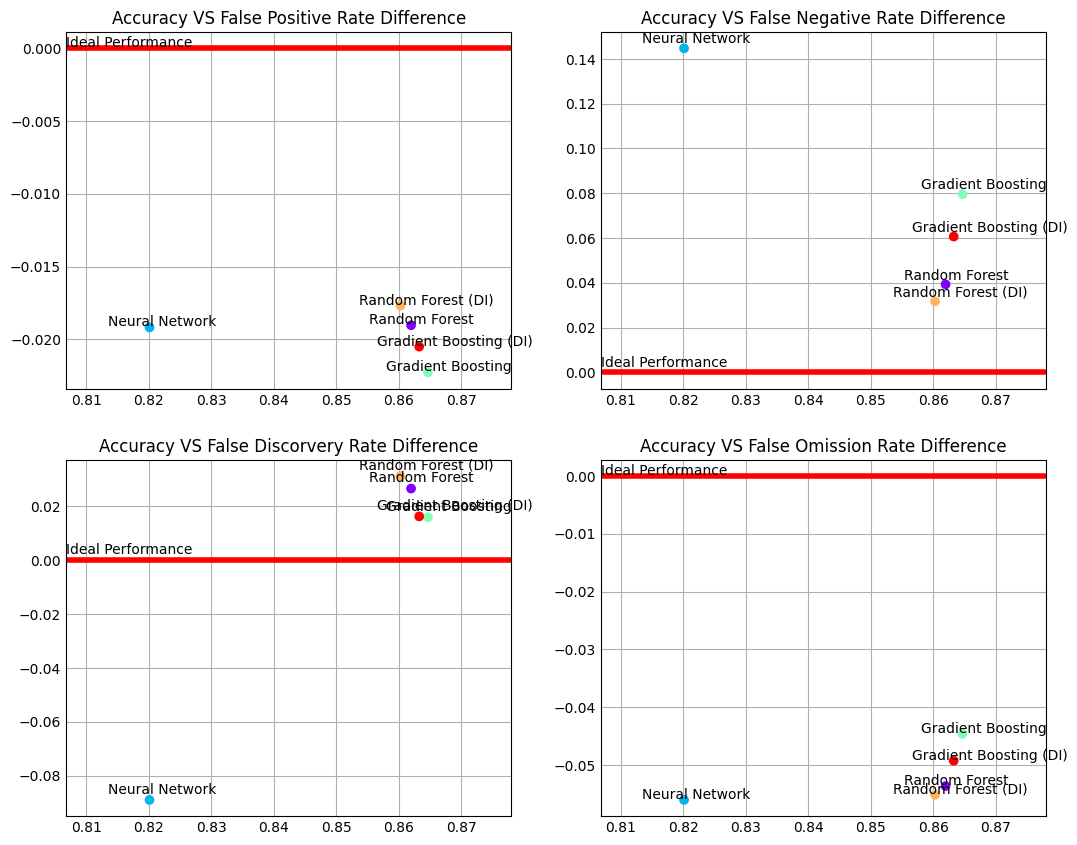

In [24]:
%matplotlib ipympl
%matplotlib inline

plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(2,2,figsize=(10,8))

putil.plot_scatter(ax[0][0],result["Accuracy"],result["FPR Difference"],"Accuracy VS False Positive Rate Difference",result.index)
putil.plot_scatter(ax[0][1],result["Accuracy"],result["FNR Difference"],"Accuracy VS False Negative Rate Difference",result.index)
putil.plot_scatter(ax[1][0],result["Accuracy"],result["FDR Difference"],"Accuracy VS False Discorvery Rate Difference",result.index)
putil.plot_scatter(ax[1][1],result["Accuracy"],result["FOR Difference"],"Accuracy VS False Omission Rate Difference",result.index)

plt.show()